In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

to do:
    
    compute small and large separations
    
    fazer um gráfico sobre as frequências mais pequenas e comentar, como no paper
    
    fazer grafico como fig 1 e fig 2 do paper 1
    
    echelle diagram, fig 4 do paper II

In [2]:
dir = "/home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/"

In [3]:
count = 0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)

File count in dir /home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/ is:  4


# Reading and writing to an array all data from the 4 given files

In [4]:
files=['data2calib1pm1.txt','data2calib1pm2.txt','data2calib2pm1.txt','data2calib2pm2.txt']
# 4 * 197640 = 790560 (total number of files)

data = []

for i in range(count):

    df = pd.read_fwf(dir+files[i], header=None)

    #print(df.iloc[:, 0])

    cols = []

    col1 = df.iloc[:, 0]
    col1 = col1.to_numpy()
    cols.append(col1)

    col2 = df.iloc[:, 1]
    col2 = col2.to_numpy()
    cols.append(col2)

    col3 = df.iloc[:, 2]
    col3 = col3.to_numpy()
    cols.append(col3)

    col4 = df.iloc[:, 3]
    col4 = col4.to_numpy()
    cols.append(col4)

    cols=np.transpose(cols)

    total_data = []
    for i in range(len(cols)):
        total_data = np.concatenate((total_data,cols[i]))

    print('len total data is', len(total_data))
    print('total_data=',total_data)
    
    data.append(total_data)

print(len(data))

len total data is 790560
total_data= [ 1.50149   2.30147   2.62921  ... -0.742475 -0.372451 -0.705769]
len total data is 790560
total_data= [ 2.86432   1.14755   2.12823  ... -0.922284 -0.529985  0.329631]
len total data is 790560
total_data= [0.50515829 1.3302755  1.6729898  ... 0.66231921 1.042013   0.7002185 ]
len total data is 790560
total_data= [2.0270191  0.15797815 1.2245789  ... 1.9980327  2.4186784  3.3428601 ]
4


In [5]:
print(count)

4


Write all data for each calibration and photomultiplier in just one row

In [6]:
import csv

for i in range(len(data)):
    with open('data{}.csv'.format(i), 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data[i])

Read all data for each calibration and photomultiplier in just one row

# Plotting timeseries of 1st file

[0.00000000e+00 2.30216847e-04 4.60433693e-04 ... 1.81999540e+02
 1.81999770e+02 1.82000000e+02]
790560


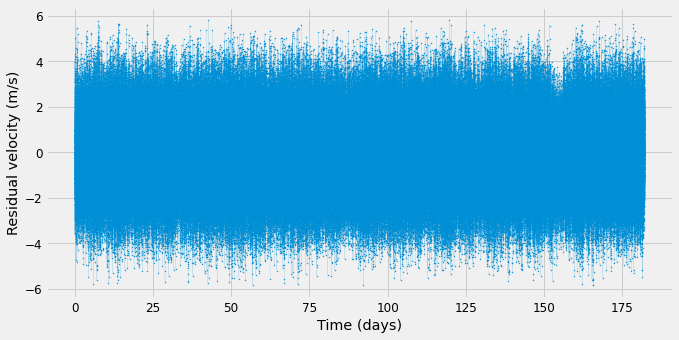

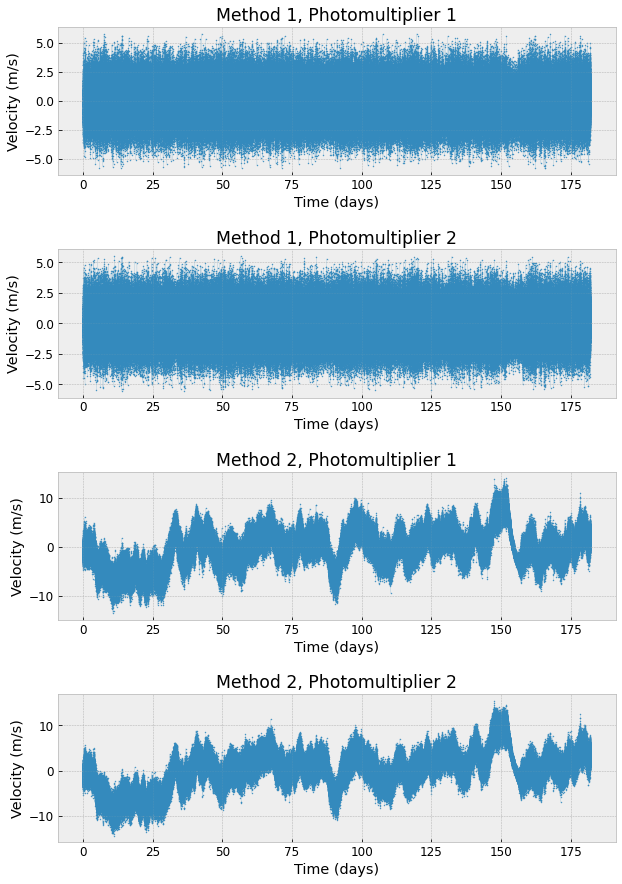

In [7]:
import seaborn as sns
tips = sns.load_dataset('tips')

#183 days
plt_x = np.linspace(0, 182, 790560)
print(plt_x)
print(len(plt_x))


with plt.style.context('fivethirtyeight'):
    #plt.scatter(plt_x, data[0], linewidth=1,cmap = 'Blues', alpha=0.4,s=5,c=plt_x)
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.scatter(plt_x, data[0], cmap = 'Blues', alpha=0.8,s=1)
    plt.plot(plt_x, data[0], linewidth=0.1, alpha=0.8)

plt.xlabel('Time (days)')
plt.ylabel('Residual velocity (m/s)')
plt.show()

titles = ['Method 1, Photomultiplier 1','Method 1, Photomultiplier 2','Method 2, Photomultiplier 1','Method 2, Photomultiplier 2']
# making 4 plot image    
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)
    
    fig, ax = plt.subplots(4, 1,figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)


    for i in range(len(data)):


        ax[i].set_title(titles[i])

        ax[i].scatter(plt_x, data[i], cmap = 'Blues', alpha=0.8,s=1)
    
        ax[i].plot(plt_x, data[i], linewidth=0.1, alpha=0.8)

        ax[i].set_xlabel('Time (days)')

        ax[i].set_ylabel('Velocity (m/s)')
    
    plt.show()
    



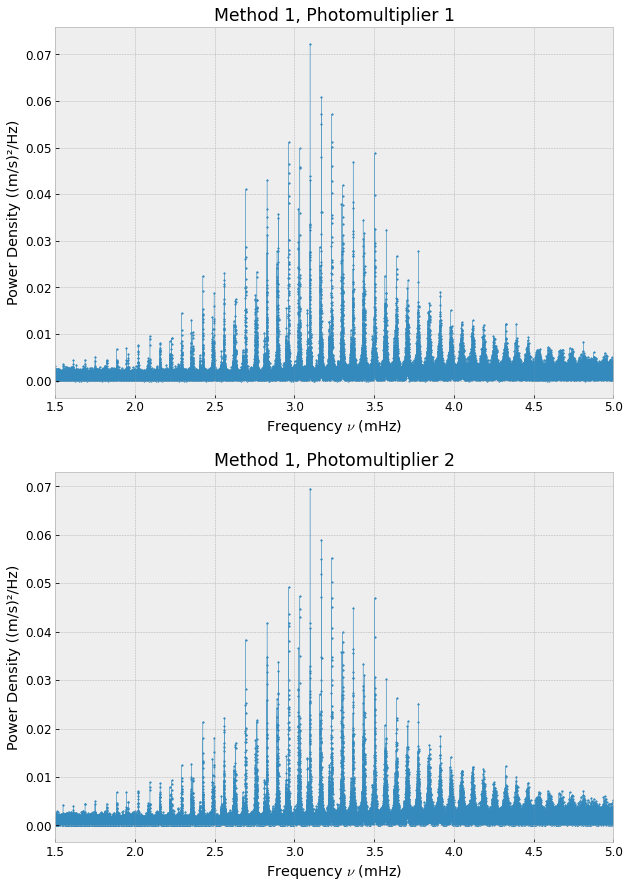

In [8]:
# From Pythonic: Applying Fourier Transform In Python Using Numpy.fft 

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 1/20;
#samplingFrequency   = 1/20*10**(-6);

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;
#samplingInterval       = 20*10**6

# Begin time period of the signals
beginTime           = 0; 

# End time period of the signals
endTime             = 182*24*60*60; 
 
# Time points
time        = np.arange(beginTime, endTime, samplingInterval);


freqs=[]
FT=[]
# Perform FFT of the 4 given files
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 12})
    
    fig, ax = plt.subplots(2, 1,figsize=(10, 15))

    tpCount     = len(data[0])
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod*1000
    freqs.append(frequencies)

    for i in range(len(data)-2):

        # Frequency domain representation
        fourierTransform = np.fft.fft(data[i])/len(data[i])           # Normalize amplitude
        fourierTransform = fourierTransform[range(int(len(data[i])/2))] # Exclude sampling frequency
        FT.append(abs(fourierTransform))

        if (i == 0 or i == 1):
            ax[i].set_xlim([1.5,5])


        ax[i].set_title(titles[i])

        ax[i].scatter(frequencies, abs(fourierTransform), cmap = 'Blues', alpha=1, s=2.5)
        ax[i].plot(frequencies, abs(fourierTransform), linewidth=0.4, alpha=0.8)

        ax[i].set_xlabel('Frequency $\\nu$ (mHz)')

        ax[i].set_ylabel('Power Density ((m/s)²/Hz)')
    
    plt.show()

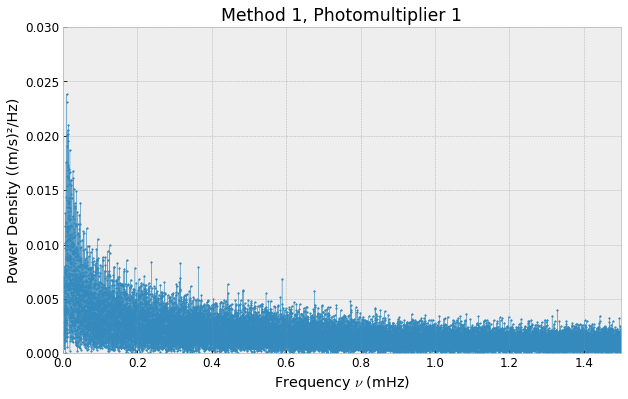

In [19]:
# Perform FFT of the 4 given files
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 12})

    tpCount     = len(data[0])
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod*1000
    freqs.append(frequencies)


    # Frequency domain representation
    fourierTransform = np.fft.fft(data[0])/len(data[0])           # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(data[0])/2))] # Exclude sampling frequency


    plt.xlim([0, 1.5])
    plt.ylim([0, 0.03])


    plt.title(titles[0])

    plt.scatter(frequencies, abs(fourierTransform), cmap = 'Blues', alpha=1, s=2.5)
    plt.plot(frequencies, abs(fourierTransform), linewidth=0.4, alpha=0.8)

    plt.xlabel('Frequency $\\nu$ (mHz)')

    plt.ylabel('Power Density ((m/s)²/Hz)')
    
    plt.show()

Plots style definitions

In [20]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 12})

Analysis of data[0] (this is the zone analysed in the paper)

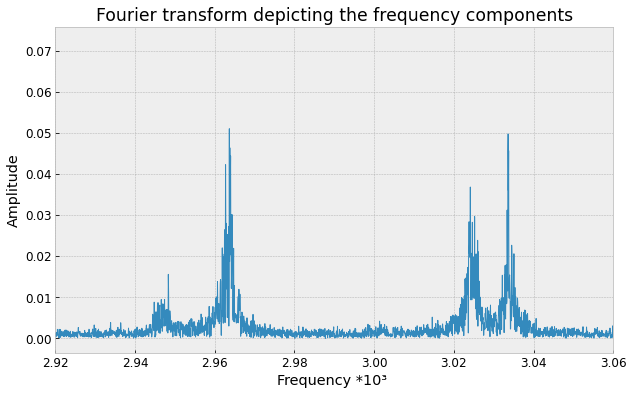

In [21]:
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_xlim([2.920, 3.0600])

    ax.set_title('Fourier transform depicting the frequency components')

    ax.plot(freqs[0], FT[0],linewidth=1)

    ax.set_xlabel('Frequency *10³ ')

    ax.set_ylabel('Amplitude')

    plt.show()

Defining fit function

In [22]:
import math
from scipy.optimize import curve_fit

def lorentz(x, A, sigma, x0):
    y = A/math.pi*(sigma)/((x-x0)**2+(sigma)**2)
    return y

def gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

0.00011851069539714505
4.63243493976547e-09
[1.13553249e-04 1.44038154e-03 2.96358585e+00]
0.00399889530438759


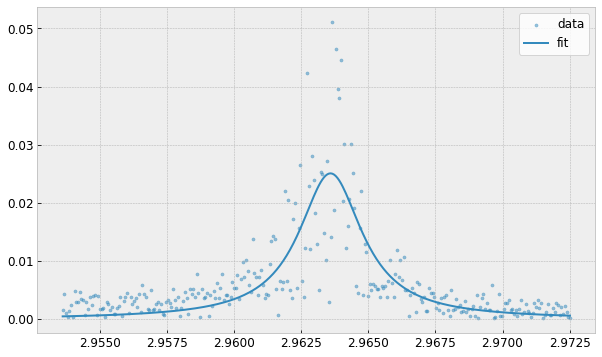

In [23]:
xdata = freqs[0][46700:47000]
ydata  = FT[0][46700:47000]

# fit
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_A = pars[0]
fit_sigma = pars[1]
fit_x0 = pars[2]

fit_y = lorentz(xdata, fit_A, fit_sigma, fit_x0)
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 12})
    plt.scatter(xdata, ydata, label='data', s=10, alpha=0.5)
    plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

sigma_squared = np.sqrt(cov[0][0]+cov[1][1]+cov[2][2])
print(sigma_squared)
print(cov[2][2])

print(pars)
print(0.00011851069539714505/2.96358585*100) # erro é ~0.0040 % mais pequeno do que a frequencia... hm

# Fit to more peaks

Fitting peaks with frequencies between 2.6563448694596232 and 3.668285772110909

In [24]:
frequencies_theory_l0 = [0.535308, 0.679501, 0.970528, 1.115391, 1.260426, 1.403781, 1.543825, 1.681478, 1.817298, 1.953574, 2.090097, 2.225231, 2.359319, 2.492708, 2.626554, 2.761449, 2.896414, 3.031626, 3.16692, 3.302485, 3.438826, 3.575348, 3.712182, 3.849159, 3.986249, 4.123775, 4.261271, 4.398846, 4.536387, 4.673751, 4.946911, 5.095484, 5.234301, 5.373123, 5.512118, 5.65101, 5.78991, 5.928871, 6.067785, 6.206761, 6.345584, 6.48434, 6.62311, 6.761761, 7.038738, 7.176977, 7.315157, 7.453125, 7.590913]
frequencies_theory_l1 = [0.891473, 1.036782, 1.182289, 1.325785, 1.468123, 1.606647, 1.743139, 1.879592, 2.015963, 2.152349, 2.28712, 2.42074, 2.554625, 2.689054, 2.824228, 2.959557, 3.094791, 3.23037, 3.366419, 3.502967, 3.639851, 3.776819, 3.913997, 4.051451, 4.189064, 4.326765, 4.464404, 4.601967, 4.739407, 4.876241, 5.023275, 5.162115, 5.301017, 5.44002, 5.579044, 5.718011, 5.857005, 5.996009, 6.135015, 6.273986]
frequencies_theory_l2 = [0.957193, 1.101802, 1.246902, 1.390052, 1.530353, 1.668165, 1.804061, 1.940584, 2.077293, 2.212784, 2.34722, 2.480858, 2.615009, 2.750181, 2.885445, 3.02098, 3.156551, 3.292407, 3.42903, 3.565824, 3.702942, 3.840181, 3.977531, 4.115312, 4.253053, 4.390873, 4.528647, 4.66624, 4.803671, 4.939921, 5.088536, 5.227532, 5.366524, 5.505683, 5.644735, 5.783787, 5.922895, 6.06195, 6.201058]
frequencies_theory_l3 = [0.864609, 1.012056, 1.158037, 1.302591, 1.445901, 1.585199, 1.722534, 1.859199, 1.995954, 2.132971, 2.268246, 2.402443, 2.536677, 2.671394, 2.807062, 2.942791, 3.078497, 3.214521, 3.350926, 3.487938, 3.625222, 3.762608, 3.900194, 4.037984, 4.175992, 4.314043, 4.452032, 4.589953, 4.727719, 4.864958, 4.999742, 5.151218, 5.290399, 5.429645, 5.56893, 5.708133, 5.847348, 5.986578, 6.125788, 6.264974]

n is ordem radial; l is graus
1 coluna      = grau, 
2 coluna      = ordem radial,
ultima coluna = frequencia propria (mHz)

In [25]:
# PM1
xdata1 = freqs[0]
ydata1  = FT[0]
# PM2
xdata2 = freqs[0]
ydata2  = FT[1]

2.8018113742157458
3.2002631046346894
[2.811517152646446, 2.8280574248570343, 2.8899131722863713, 2.898807801438619, 2.9471973587864397, 2.9635477160024823, 3.024888025731724, 3.0336297536557364, 3.0823303435875706, 3.0980123869896374, 3.1598429468912683, 3.1686066415655336]


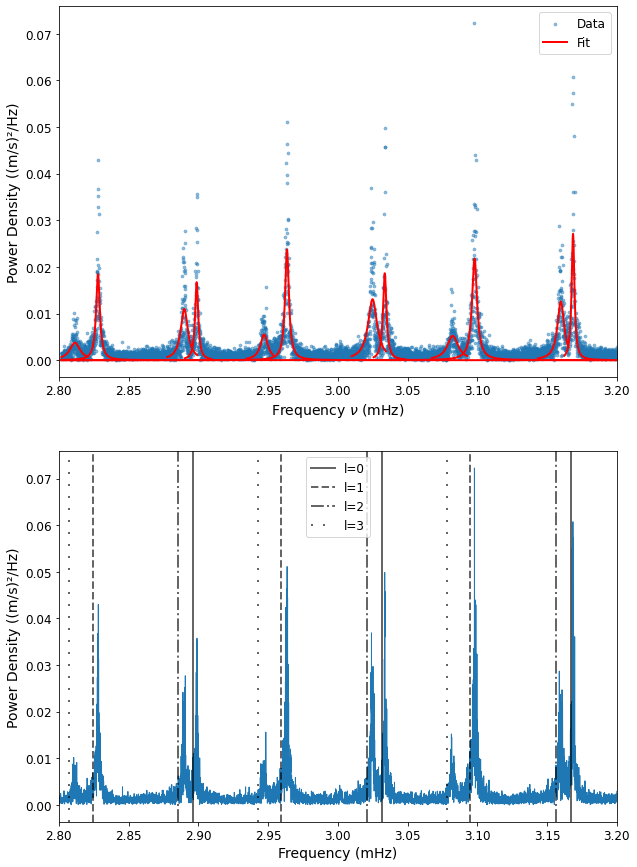

chi squared =  7.018409072597251e-09


In [26]:
fitted_frequencies_pm1 = []

print(freqs[0][44300])
print(freqs[0][50600])

fig, ax = plt.subplots(2, 1,figsize=(10, 15))

xdata = freqs[0][44300:50600]
ydata  = FT[0][44300:50600]
with plt.style.context('bmh'):
    ax[0].set_xlim([2.8, 3.2])
    ax[0].scatter(xdata, ydata, cmap = 'Blues', label='Data', s=10, alpha=0.5)
    plt.rcParams['figure.figsize'] = (10, 6)
    ax[0].set_xlabel('Frequency $\\nu$ (mHz)', fontsize=14)
    ax[0].set_ylabel('Power Density ((m/s)²/Hz)', fontsize=14)

    ### fit 1 ###
    guess = [200, 0.0002, 2.96358]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-', label='Fit',color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 2 ###
    guess = [100, 0.002, 3.099]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-', color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 3 ###
    xdata = freqs[0][45500:45840]
    ydata  = FT[0][45500:45840]
    guess = [300, 0.00002, 2.889]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-',color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 4 ###

    xdata = freqs[0][45700:46000]
    ydata  = FT[0][45700:46000]
    guess = [300, 0.00002, 2.90]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-', color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 5 ###

    xdata = freqs[0][46400:46700]
    ydata  = FT[0][46400:46700]
    guess = [50, 0.00002, 2.9472]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-', color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 6 ###

    xdata = freqs[0][47590:47980]
    ydata  = FT[0][47590:47980]
    guess = [399, 0.00002, 3.024]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-', color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 7 ###

    xdata = freqs[0][47840:48200]
    ydata  = FT[0][47840:48200]
    guess = [300, 0.00002, 3.026]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-', color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 8 ###

    xdata = freqs[0][48500:48900]
    ydata  = FT[0][48500:48900]
    guess = [30, 0.00002, 3.082]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-',color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 9 ###

    xdata = freqs[0][44300:45300]
    ydata  = FT[0][44300:45300]
    guess = [30, 0.00002, 2.81]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-',color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 10 ###

    xdata = freqs[0][44300:44600]
    ydata  = FT[0][44300:44600]
    guess = [30, 0.00002, 2.81]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-',color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 11 ###

    xdata = freqs[0][49700:50050]
    ydata  = FT[0][49700:50050]
    guess = [30, 0.00002, 3.16]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-',color='red')

    fitted_frequencies_pm1.append(pars[2])

    ### fit 12 ###

    xdata = freqs[0][50000:50500]
    ydata  = FT[0][50000:50500]
    guess = [30, 0.00002, 3.17]

    pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
    fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

    ax[0].plot(xdata, fit_y, '-',color='red')

    fitted_frequencies_pm1.append(pars[2])

    fitted_frequencies_pm1.sort()
    print(fitted_frequencies_pm1)

    ##### theoretical frequencies #####

    with plt.style.context('bmh'):
        ax[1].set_xlim([2.8, 3.2])
        #plt.title('Fourier transform depicting the frequency components PM1')
        ax[1].set_xlabel('Frequency (mHz)', fontsize=14)
        ax[1].set_ylabel('Power Density ((m/s)²/Hz)', fontsize=14)
        ax[1].plot(xdata1, ydata1, linewidth=1, alpha=1)
        #plt.plot(xdata2, ydata2, label='PM2', linewidth=1, alpha=1)

    k = 0
    for i in frequencies_theory_l0:
        k +=1
        if k == 1:
            ax[1].axvline(x = i, color = 'black', linestyle = 'solid', label = 'l=0', alpha=0.6)
        else:
            ax[1].axvline(x = i, color = 'black', linestyle = 'solid', alpha=0.6)

    k = 0
    for i in frequencies_theory_l1:
        k +=1
        if k == 1:
            ax[1].axvline(x = i, color = 'black', linestyle = '--', label = 'l=1', alpha=0.6)
        else:
            ax[1].axvline(x = i, color = 'black', linestyle = '--', alpha=0.6)

    k = 0
    for i in frequencies_theory_l2:
        k +=1
        if k == 1:
            ax[1].axvline(x = i, color = 'black', linestyle = 'dashdot', label = 'l=2', alpha=0.6)
        else:
            ax[1].axvline(x = i, color = 'black', linestyle = 'dashdot', alpha=0.6)

    k = 0
    for i in frequencies_theory_l3:
        k +=1
        if k == 1:
            ax[1].axvline(x = i, color = 'black', linestyle = (0, (1,5)), label = 'l=3', alpha=0.6)
        else:
            ax[1].axvline(x = i, color = 'black', linestyle = (0, (1,5)), alpha=0.6)



ax[0].legend()

ax[1].legend()

plt.show()

print('chi squared = ', cov[1][1]+cov[2][2]+cov[0][0])

Same fits but on data from PM2:

2.795486743574175
3.193938473993119


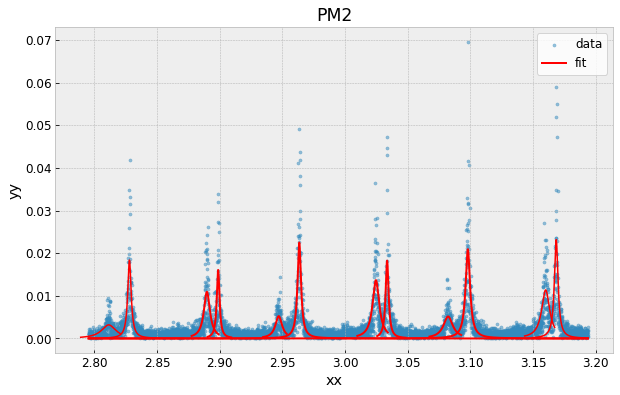

[2.811487926924859, 2.828057053960377, 2.8898583619205382, 2.898821670293267, 2.94715541368616, 2.9635505364711805, 3.024694119053016, 3.0336273805428577, 3.082285831208885, 3.0980188849606014, 3.1601280401785656, 3.168534301366742]


In [27]:
fitted_frequencies_pm2 = []

print(freqs[0][44200])
print(freqs[0][50500])

xdata = freqs[0][44200:50500]
ydata  = FT[1][44200:50500]
with plt.style.context('bmh'):
    plt.scatter(xdata, ydata, cmap = 'Blues', label='data', s=10, alpha=0.5)
    plt.rcParams.update({'font.size': 12})
    plt.title('PM2')
    plt.xlabel('xx')
    plt.ylabel('yy')
    

### fit 1 ###
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 2 ###
guess = [100, 0.002, 3.099]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')
    
fitted_frequencies_pm2.append(pars[2])

### fit 3 ###
xdata = freqs[0][45500:45840]
ydata  = FT[1][45500:45840]
guess = [300, 0.00002, 2.889]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 4 ###

xdata = freqs[0][45700:46000]
ydata  = FT[1][45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')
    
fitted_frequencies_pm2.append(pars[2])

### fit 5 ###

xdata = freqs[0][46400:46700]
ydata  = FT[1][46400:46700]
guess = [50, 0.00002, 2.9472]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 6 ###

xdata = freqs[0][47590:47975]
ydata  = FT[1][47590:47975]
guess = [399, 0.00002, 3.024]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 7 ###

xdata = freqs[0][47840:48200]
ydata  = FT[1][47840:48200]
guess = [300, 0.00002, 3.026]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 8 ###

xdata = freqs[0][48500:48900]
ydata  = FT[1][48500:48900]
guess = [30, 0.00002, 3.082]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 9 ###

xdata = freqs[0][44200:45400]
ydata  = FT[0][44200:45400]
guess = [30, 0.00002, 2.81]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 10 ###

xdata = freqs[0][44100:44600]
ydata  = FT[0][44100:44600]
guess = [30, 0.00002, 2.81]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 11 ###

xdata = freqs[0][49700:50080]
ydata  = FT[0][49700:50080]
guess = [30, 0.00002, 3.161]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 12 ###

xdata = freqs[0][49800:50500]
ydata  = FT[0][49800:50500]
guess = [30, 0.00002, 3.168]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

plt.legend()
plt.show()
fitted_frequencies_pm2.sort()
print(fitted_frequencies_pm2)

In [28]:
avg_fitted_frequencies = [(x + y)/2 for x, y in zip(fitted_frequencies_pm1, fitted_frequencies_pm2)]
err_avg_fitted_frequencies = abs(np.subtract(avg_fitted_frequencies,fitted_frequencies_pm1))

In [75]:
print(avg_fitted_frequencies)
print(err_avg_fitted_frequencies)
avg_fitted_frequencies.sort()
print(avg_fitted_frequencies)

[2.8115025397856526, 2.8280572394087056, 2.889885767103455, 2.898814735865943, 2.9471763862362996, 2.963549126236831, 3.02479107239237, 3.033628567099297, 3.0823080873982276, 3.0980156359751194, 3.1599854935349168, 3.168570471466138]
[3.54526915e-06 1.73209056e-05 1.27693654e-06 2.79201896e-06
 6.93442732e-06 7.51088081e-11 0.00000000e+00 2.98227011e-05
 4.69835835e-06 3.73468847e-05 3.76525480e-05 8.04580900e-05
 6.65038046e-05]
[2.8115025397856526, 2.8280572394087056, 2.889885767103455, 2.898814735865943, 2.9471763862362996, 2.963549126236831, 3.02479107239237, 3.033628567099297, 3.0823080873982276, 3.0980156359751194, 3.1599854935349168, 3.168570471466138]


# Computing Small Separation for the fitted frequencies

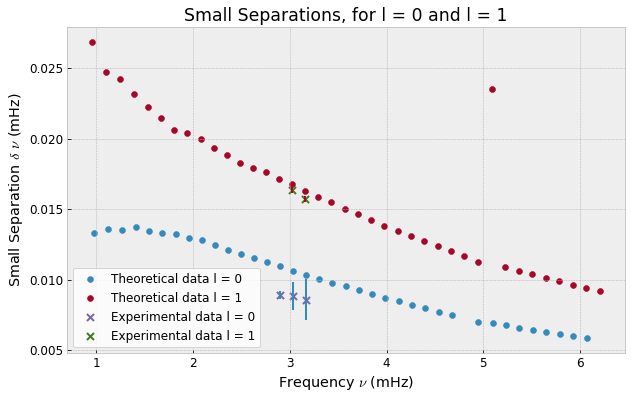

In [30]:
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})
    plt.title('Small Separations, for l = 0 and l = 1')
    plt.xlabel('Frequency $\\nu$ (mHz)')
    plt.ylabel('Small Separation $\delta$ $\\nu$ (mHz)')
    
    # theoretical data
    n02 = [0.970528, 1.115391, 1.260426, 1.403781, 1.543825, 1.681478, 1.817298, 1.953574, 2.090097, 2.225231, 2.359319, 2.492708, 2.626554, 2.761449, 2.896414, 3.031626, 3.16692, 3.302485, 3.438826, 3.575348, 3.712182, 3.849159, 3.986249, 4.123775, 4.261271, 4.398846, 4.536387, 4.673751, 4.946911, 5.095484, 5.234301, 5.373123, 5.512118, 5.65101, 5.78991, 5.928871, 6.067785]
    n13 = [0.957193, 1.101802, 1.246902, 1.390052, 1.530353, 1.668165, 1.804061, 1.940584, 2.077293, 2.212784, 2.34722, 2.480858, 2.615009, 2.750181, 2.885445, 3.02098, 3.156551, 3.292407, 3.42903, 3.565824, 3.702942, 3.840181, 3.977531, 4.115312, 4.253053, 4.390873, 4.528647, 4.66624, 4.803671, 4.939921, 5.088536, 5.227532, 5.366524, 5.505683, 5.644735, 5.783787, 5.922895, 6.06195, 6.201058]

    SS02 = [0.013335, 0.013589, 0.013524, 0.013729, 0.013472, 0.013313, 0.013237, 0.01299, 0.012804, 0.012447, 0.012099, 0.01185, 0.011545, 0.011268, 0.010969, 0.010646, 0.010369, 0.010078, 0.009796, 0.009524, 0.00924, 0.008978, 0.008718, 0.008463, 0.008218, 0.007973, 0.00774, 0.007511, 0.00699, 0.006948, 0.006769, 0.006599, 0.006435, 0.006275, 0.006123, 0.005976, 0.005835]
    SS13 = [0.026864, 0.024726, 0.024252, 0.023194, 0.022222, 0.021448, 0.020605, 0.020393, 0.020009, 0.019378, 0.018874, 0.018297, 0.017948, 0.01766, 0.017166, 0.016766, 0.016294, 0.015849, 0.015493, 0.015029, 0.014629, 0.014211, 0.013803, 0.013467, 0.013072, 0.012722, 0.012372, 0.012014, 0.011688, 0.011283, 0.023533, 0.010897, 0.010618, 0.010375, 0.010114, 0.009878, 0.009657, 0.009431, 0.009227]

    plt.scatter(n02, SS02, label='Theoretical data l = 0', marker = "o", cmap= 'Blues')
    plt.scatter(n13, SS13, label='Theoretical data l = 1', marker = "o", cmap= 'Blues')

    # experimental data
    exp_n02 = [2.896414, 3.031626, 3.16692]
    exp_n13 = [3.02098, 3.156551]

    exp_SS02 = [0.008928968762, 0.008837494707, 0.008584977931]
    exp_SS13 = [0.01637274, 0.01570754858]
    
    err_exp_SS02 = [0.00002826889336, 0.00009696059992, 0.0001470640058]
    err_exp_SS02 = np.array(err_exp_SS02)
    err_exp_SS02 = err_exp_SS02 * 10

    err_exp_SS13 = [0.00002101991005, 0.00002249208458]
    err_exp_SS13 = np.array(err_exp_SS13)
    err_exp_SS13 = err_exp_SS13 * 10
    
    plt.scatter(exp_n02, exp_SS02, label='Experimental data l = 0',marker="x", s=50, cmap= 'Blues')
    plt.scatter(exp_n13, exp_SS13, label='Experimental data l = 1',marker="x", s=50, cmap= 'Blues')

    plt.errorbar(exp_n02, exp_SS02, yerr=err_exp_SS02, ls='none')
    plt.errorbar(exp_n13, exp_SS13, yerr=err_exp_SS13, ls='none')
    
plt.legend()
plt.show()

# Computing Large Separation for the fitted frequencies

Data about the large separation of the peaks shown above (and below) is written in the google sheets.

# Graph of Large Separation as a function of frequencies for l = 0, PM1 & PM2

[2.898807801438619, 3.03359802402775, 3.1686041672938488, 3.2995856754364787, 3.4344526176373704, 2.7641255441880945]


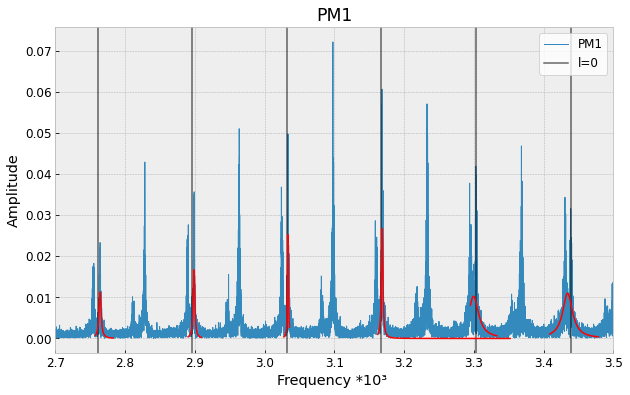

[2.898821670293267, 3.033598024177968, 3.1686041672938488, 3.299645320838617, 3.434462014354075, 2.7641311282260133]


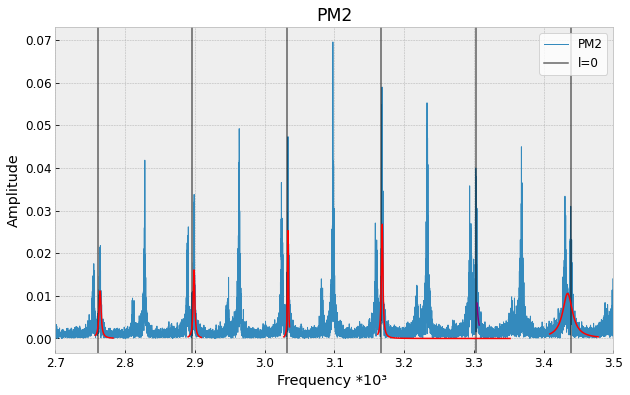

In [31]:
# PM1
xdata1 = freqs[0]
ydata1  = FT[0]

peaks_l0_pm1 =[]


with plt.style.context('bmh'):
    plt.xlim([2.7, 3.5])
    #plt.xlim([2.7, 2.8])
    plt.title('PM1')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata1, ydata1, label='PM1', linewidth=1, alpha=1)
    #plt.plot(xdata2, ydata2, label='PM2', linewidth=1, alpha=1)
    

k = 0
for i in frequencies_theory_l0:
    if k==1:
        plt.axvline(x = i, color = 'black', alpha=0.6, label = 'l=0')
    else:
        plt.axvline(x = i, color = 'black', alpha=0.6)
    k += 1

######## PM1 ########

### fit 1 pm1 ###

xdata = freqs[0][45700:46000]
ydata  = FT[0][45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm1.append(pars[2])

### fit 2 pm1 ### newest peak

xdata = freqs[0][47870:48000]
ydata  = FT[0][47870:48000]
guess = [10, 0.0002, 3.0311]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm1.append(pars[2])
    
### fit 3 pm1 ### newest peak

xdata = freqs[0][50000:53000]
ydata  = FT[0][50000:53000]
guess = [0.000280461329, 0.00818529237, 3.16597460]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm1.append(pars[2])

### fit 4 pm1 ### newest peak

xdata = freqs[0][52100:52700]
ydata  = FT[1][52100:52700]
guess = [0.000280461329, 0.00818529237, 3.3]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

peaks_l0_pm1.append(pars[2])

### fit 5 pm1 ### new peak

xdata = freqs[0][53900:55000]
ydata  = FT[0][53900:55000]
guess = [0.000280461329, 0.00818529237, 3.438]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

peaks_l0_pm1.append(pars[2])

### fit 6 pm1 ### new peak

xdata = freqs[0][43600:44000]
ydata  = FT[0][43600:44000]
guess = [0.000280461329, 0.00818529237, 2.6265]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm1.append(pars[2])

print(peaks_l0_pm1)


plt.legend()
plt.show()

######## PM2 ########

# PM2
xdata2 = freqs[0]
ydata2  = FT[1]

peaks_l0_pm2 =[]


with plt.style.context('bmh'):
    plt.xlim([2.7, 3.5])
    plt.title('PM2')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata2, ydata2, label='PM2', linewidth=1, alpha=1)
    

k = 0
for i in frequencies_theory_l0:
    if k==1:
        plt.axvline(x = i, color = 'black', alpha=0.6, label = 'l=0')
    else:
        plt.axvline(x = i, color = 'black', alpha=0.6)
    k += 1


### fit 1 pm2 ###

xdata = freqs[0][45700:46000]
ydata  = FT[1][45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm2.append(pars[2])

### fit 2 pm2 ### newest peak

xdata = freqs[0][47870:48000]
ydata  = FT[0][47870:48000]
guess = [10, 0.0002, 3.031]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm2.append(pars[2])
    
### fit 3 pm2 ### newest peak

xdata = freqs[0][50000:53000]
ydata  = FT[0][50000:53000]
guess = [0.000280461329, 0.00818529237, 3.16597460]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm2.append(pars[2])

### fit 4 pm2 ### newest peak

xdata = freqs[0][52250:52300]
ydata  = FT[1][52250:52300]
guess = [0.000280461329, 0.00818529237, 3.3]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='purple')

peaks_l0_pm2.append(pars[2])

### fit 5 pm2 ### new peak

xdata = freqs[0][53900:55000]
ydata  = FT[1][53900:55000]
guess = [0.000280461329, 0.00818529237, 3.438]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

peaks_l0_pm2.append(pars[2])

### fit 6 pm2 ###

xdata = freqs[0][43600:44000]
ydata  = FT[1][43600:44000]
guess = [0.000280461329, 0.00818529237, 2.6265]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm2.append(pars[2])


print(peaks_l0_pm2)
plt.legend()
plt.show()

Fitting to more peaks in lower frequencies or higher

0 0 0
1 0 1
2 1 0
3 1 1


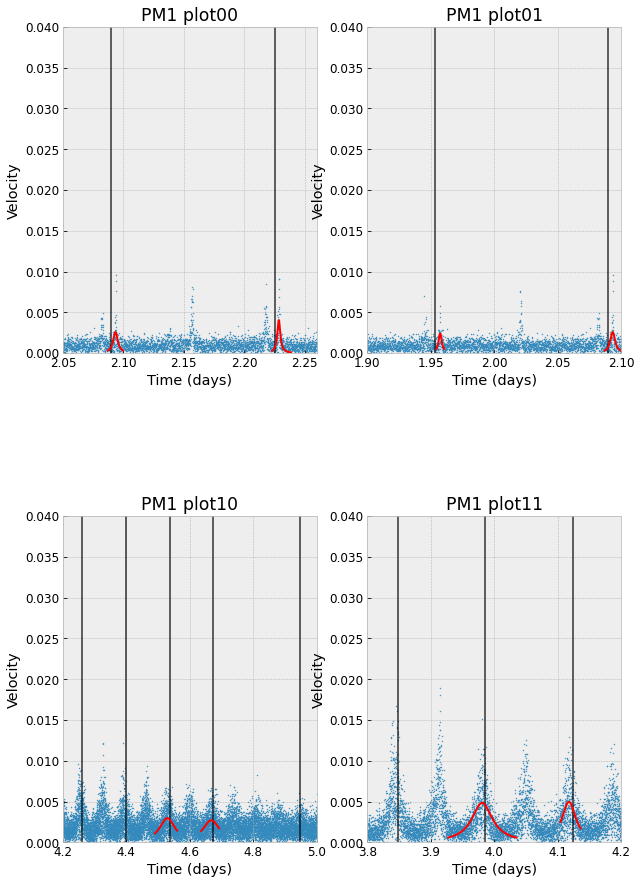

0 0 0
1 0 1
2 1 0
3 1 1


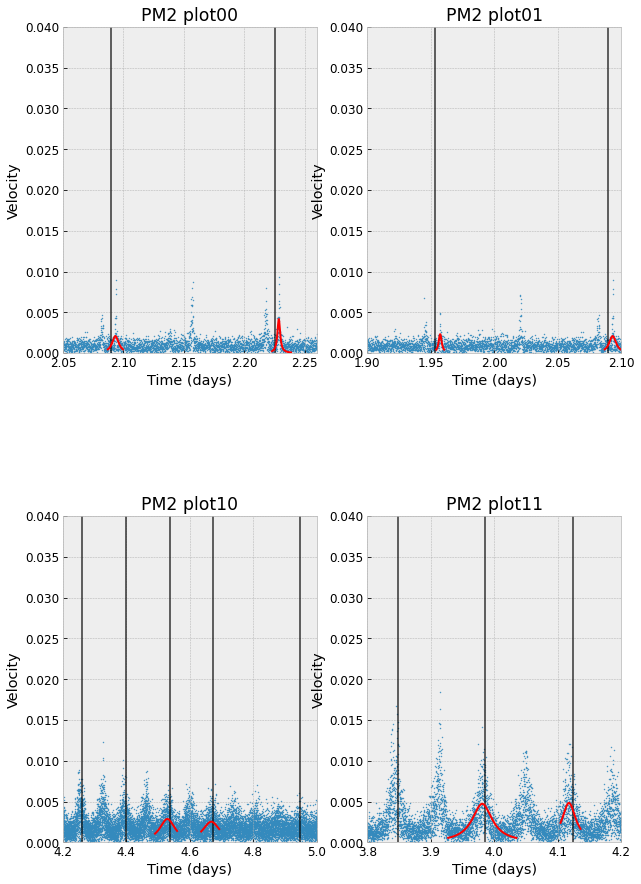

In [32]:
########## PM 1 ########## 
# making 4 plot image    
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)
    
    fig, ax = plt.subplots(2, 2,figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)

    j = 0
    tit = 0
    for i in range(4):
        k = 0
        if np.mod(i,2)!=0:
            k = 1
                       
        print(i, j, k)
        
        for line in frequencies_theory_l0:
            ax[j][k].axvline(x = line, color = 'black', alpha=0.6)
    
        if i == 0:
            ### fit 1 & 2 ###

            xdata = freqs[0][35150:35400]
            ydata  = FT[0][35150:35400]

            ax[j][k].set_xlim([2.05,2.26])
            ax[j][k].set_ylim([0,0.04])

            guess = [300, 0.00002, 2.225]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[0][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
        elif i == 1:
            
            ### fit 3 & 4 ###

            xdata = freqs[0][30900:31000]
            ydata  = FT[0][30900:31000]
            guess = [1, 0.00002, 1.955]

            ax[j][k].set_xlim([1.900,2.1])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[0][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
        elif i == 2:
            ### fit 5 & 6 ###

            xdata = freqs[0][71000:72100]
            ydata  = FT[0][71000:72100]
            guess = [100, 0.00002, 4.53]

            ax[j][k].set_xlim([4.2,5])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][73300:74200]
            ydata  = FT[0][73300:74200]

            guess = [300, 0.00002, 4.67]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm1.append(pars[2])
            
        elif i == 3:
            ### fit 7 & 8 ###

            xdata = freqs[0][64900:65400]
            ydata  = FT[0][64900:65400]
            guess = [100, 0.00002, 4.12]

            ax[j][k].set_xlim([3.8,4.2])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][62100:63800]
            ydata  = FT[0][62100:63800]

            guess = [300, 0.00002, 3.98]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm1.append(pars[2])
    


        ax[j][k].set_title('PM1 plot{}{}'.format(j,k))
        
        
        ax[j][k].scatter(xdata1, ydata1, cmap = 'Blues', alpha=0.8,s=1)
    
        
        ax[j][k].set_xlabel('Time (days)')

        ax[j][k].set_ylabel('Velocity')
        
        if np.mod(i,2)!=0:
            j = j+1
        tit += 1
    
    plt.show()
    
########## PM 2 ########## 
# making 4 plot image    
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)
    
    fig, ax = plt.subplots(2, 2,figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)

    j = 0
    tit = 0
    for i in range(4):
        k = 0
        if np.mod(i,2)!=0:
            k = 1
                       
        print(i, j, k)
        
        for line in frequencies_theory_l0:
            ax[j][k].axvline(x = line, color = 'black', alpha=0.6)
    
        if i == 0:
            ### fit 1 & 2 ###

            xdata = freqs[0][35150:35400]
            ydata  = FT[1][35150:35400]

            ax[j][k].set_xlim([2.05,2.26])
            ax[j][k].set_ylim([0,0.04])

            guess = [300, 0.00002, 2.225]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[1][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])
            
            
            
        elif i == 1:
            
            ### fit 3 & 4 ###

            xdata = freqs[0][30900:31000]
            ydata  = FT[1][30900:31000]
            guess = [1, 0.00002, 1.955]

            ax[j][k].set_xlim([1.900,2.1])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[1][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
        elif i == 2:
            ### fit 5 & 6 ###

            xdata = freqs[0][71000:72100]
            ydata  = FT[1][71000:72100]
            guess = [100, 0.00002, 4.53]

            ax[j][k].set_xlim([4.2,5])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2]) 
            
            xdata = freqs[0][73300:74200]
            ydata  = FT[1][73300:74200]

            guess = [300, 0.00002, 4.67]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm2.append(pars[2])
            
        elif i == 3:
            ### fit 7 & 8 ###

            xdata = freqs[0][64900:65400]
            ydata  = FT[1][64900:65400]
            guess = [100, 0.00002, 4.12]

            ax[j][k].set_xlim([3.8,4.2])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])    
             
            xdata = freqs[0][62100:63800]
            ydata  = FT[1][62100:63800]

            guess = [300, 0.00002, 3.98]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm2.append(pars[2])
            

        ax[j][k].set_title('PM2 plot{}{}'.format(j,k))
        
        
        ax[j][k].scatter(xdata2, ydata2, cmap = 'Blues', alpha=0.8,s=1)
    
        
        ax[j][k].set_xlabel('Time (days)')

        ax[j][k].set_ylabel('Velocity')
        
        if np.mod(i,2)!=0:
            j = j+1
        tit += 1
    
    plt.show()

Finding average frequencies and errors

In [33]:
print(len(peaks_l0_pm1))

peaks_l0_pm1.sort()
peaks_l0_pm2.sort()

print(len(peaks_l0_pm1))
      
print(len(peaks_l0_pm2))

avg_peaks_l0 = [(x + y)/2 for x, y in zip(peaks_l0_pm1, peaks_l0_pm2)]

err_avg_fitted_frequencies = abs(np.subtract(avg_peaks_l0,peaks_l0_pm1))

print('Average frequencies = ', avg_peaks_l0)

print('Error = ', err_avg_fitted_frequencies)

13
13
13
Average frequencies =  [1.9574503298036314, 2.0934541735425025, 2.228711835602372, 2.7641283362070537, 2.898814735865943, 3.033598024102859, 3.1686041672938488, 3.299615498137548, 3.434457315995723, 3.9811275839467877, 4.117960111217405, 4.529292286338611, 4.667856679161375]
Error =  [3.54526915e-06 1.73209056e-05 1.27693654e-06 2.79201896e-06
 6.93442732e-06 7.51088081e-11 0.00000000e+00 2.98227011e-05
 4.69835835e-06 3.73468847e-05 3.76525480e-05 8.04580900e-05
 6.65038046e-05]


Large separation is now computed in the google sheets. Let's now plot the values we found.

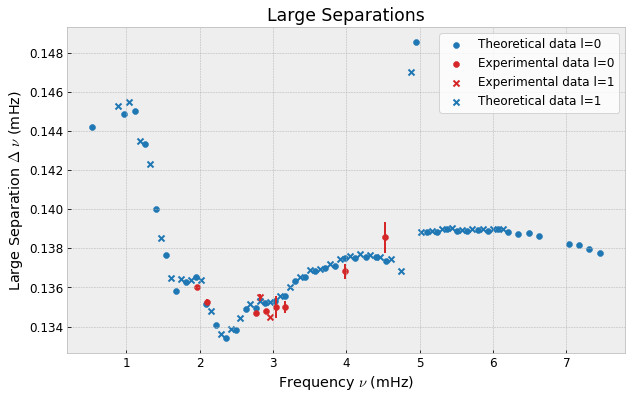

'\n    plt.scatter(exp_n02, exp_SS02, label=\'Experimental data l = 0\',marker="x", s=50, cmap= \'Blues\')\n    plt.scatter(exp_n13, exp_SS13, label=\'Experimental data l = 1\',marker="x", s=50, cmap= \'Blues\')\n\n    plt.errorbar(exp_n02, exp_SS02, yerr=err_exp_SS02, ls=\'none\')\n    plt.errorbar(exp_n13, exp_SS13, yerr=err_exp_SS13, ls=\'none\')'

In [137]:
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})
    plt.title('Large Separations')
    plt.xlabel('Frequency $\\nu$ (mHz)')
    plt.ylabel('Large Separation $\Delta$ $\\nu$ (mHz)')
    # theoretical data l = 0
    #n_teo = [3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,35,36,37,38,39,40,41,42,43,44,45,46,47,50,51,52,53]
    n_teo = [0.535308, 0.970528, 1.115391, 1.260426, 1.403781, 1.543825, 1.681478, 1.817298, 1.953574, 2.090097, 2.225231, 2.359319, 2.492708, 2.626554, 2.761449, 2.896414, 3.031626, 3.16692, 3.302485, 3.438826, 3.575348, 3.712182, 3.849159, 3.986249, 4.123775, 4.261271, 4.398846, 4.536387, 4.946911, 5.095484, 5.234301, 5.373123, 5.512118, 5.65101, 5.78991, 5.928871, 6.067785, 6.206761, 6.345584, 6.48434, 6.62311, 7.038738, 7.176977, 7.315157, 7.453125]
    LS_teo = [0.144193, 0.144863, 0.145035, 0.143355, 0.140044, 0.137653, 0.13582, 0.136276, 0.136523, 0.135134, 0.134088, 0.133389, 0.133846, 0.134895, 0.134965, 0.135212, 0.135294, 0.135565, 0.136341, 0.136522, 0.136834, 0.136977, 0.13709, 0.137526, 0.137496, 0.137575, 0.137541, 0.137364, 0.148573, 0.138817, 0.138822, 0.138995, 0.138892, 0.1389, 0.138961, 0.138914, 0.138976, 0.138823, 0.138756, 0.13877, 0.138651, 0.138239, 0.13818, 0.137968, 0.137788]

    plt.scatter(n_teo, LS_teo, label = 'Theoretical data l=0', color='tab:blue')

    # experimental data l = 0

    n_exp = [1.95745032980363, 2.09345417354250, 2.76412833620705, 2.89881473586594, 3.03359802402775, 3.16860416729384, 3.98112758394678, 4.52929228633861]
    LS_exp = [0.13600384373887, 0.13525766205987, 0.13468639965889, 0.13478328816181, 0.13500614326609, 0.13498707764369, 0.13683252727062, 0.13856439282276]
    
    err_LS_exp = [0.00000354526915, 0.00001732090560, 0.00000279201896, 0.00000693442732, 0.00005557087210, 0.00003065830250, 0.00003734688470, 0.00008045809000]
    
    err_LS_exp = np.array(err_LS_exp)*10
    
    plt.errorbar(n_exp, LS_exp, yerr=err_LS_exp, ls='none',color='tab:red')
    plt.scatter(n_exp, LS_exp, label = 'Experimental data l=0',color='tab:red')
    
    #l=1 exp
    n_exp1 = [2.824228, 2.959557]
    LS_exp1 = [0.13550, 0.13447]
    err_LS_exp1 = [0.000019, 0.0000035]
    err_LS_exp1 = np.array(err_LS_exp1)*10
    plt.scatter(n_exp1,LS_exp1, label = 'Experimental data l=1', marker="x",color='tab:red')
    plt.errorbar(n_exp1, LS_exp1, yerr=err_LS_exp1, ls='none',color='tab:red')
    
    # theoretical data l=1
    LS_teo = [0.145309, 0.145507, 0.143496, 0.142338, 0.138524, 0.136492, 0.136453, 0.136371, 0.136386, 0.134771, 0.13362, 0.133885, 0.134429, 0.135174, 0.135329, 0.135234, 0.135579, 0.136049, 0.136548, 0.136884, 0.136968, 0.137178, 0.137454, 0.137613, 0.137701, 0.137639, 0.137563, 0.13744, 0.136834, 0.147034, 0.13884, 0.138902, 0.139003, 0.139024, 0.138967, 0.138994, 0.139004, 0.139006, 0.138971]

    n_teo = [0.891473, 1.036782, 1.182289, 1.325785, 1.468123, 1.606647, 1.743139, 1.879592, 2.015963, 2.152349, 2.28712, 2.42074, 2.554625, 2.689054, 2.824228, 2.959557, 3.094791, 3.23037, 3.366419, 3.502967, 3.639851, 3.776819, 3.913997, 4.051451, 4.189064, 4.326765, 4.464404, 4.601967, 4.739407, 4.876241, 5.023275, 5.162115, 5.301017, 5.44002, 5.579044, 5.718011, 5.857005, 5.996009, 6.135015]
    
    plt.scatter(n_teo, LS_teo, label = 'Theoretical data l=1', marker="x", color='tab:blue')
    
    #l=2 exp
    n_exp2 = [2.885445, 3.02098]
    LS_exp2 = [0.13490, 0.13520]
    err_LS_exp2 = [0.00010, 0.00017]
    err_LS_exp2 = np.array(err_LS_exp2)*10
    #plt.scatter(n_exp1,LS_exp2, label = 'Experimental data l=2', marker="o",color='tab:orange')
    #plt.errorbar(n_exp1, LS_exp2, yerr=err_LS_exp2, ls='none',color='tab:orange')
   
    
    
    
    
    
plt.legend()
plt.show()

# Teo and exp frequencies comparison

Figure 3 of https://arxiv.org/pdf/1210.4286.pdf

20
20
20


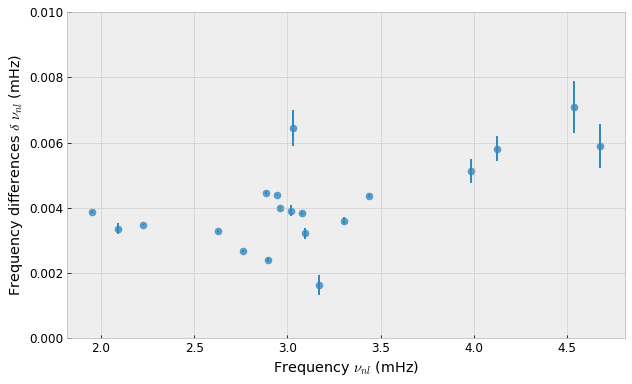

In [47]:

with plt.style.context('bmh'):
    plt.xlabel('Frequency $\\nu$ (mHz)')
    plt.ylabel('Amplitude')
    
    
    plt.rcParams.update({'font.size': 12})
    
    f_l0 = [1.953574, 2.090097, 2.225231, 2.626554, 2.761449, 2.896414, 3.031626, 3.16692, 3.302485, 3.438826, 3.986249, 4.123775, 4.536387, 4.673751, 2.959557, 3.094791, 2.885445, 3.02098, 2.942791, 3.078497]
    
    delta_f_l0 = [0.003876329804, 0.003357173542, 0.003480835602,0.003285533167, 0.002679336207, 0.002400735866, 0.006440912226, 0.001646250247, 0.003606432588, 0.004368684004, 0.005121416053, 0.005814888783, 0.007094713661, 0.005894320839, 0.003992307364, 0.00322079, 0.004468223, 0.003908053, 0.004406361, 0.003833334]

    errr = [0.000003545269150, 0.000017320905600, 0.000001276936540, 0.000004865535090, 0.000002792018960, 0.000006934427320, 0.000055570872100, 0.000030658302500, 0.000011629659900, 0.000004698358350, 0.000037346884700, 0.000037652548000, 0.000080458090000, 0.000066503804600, 0.000003545269150, 0.000017320905600, 0.000003545269150, 0.000017320905600, 0.000001276936540, 0.000004865535090]
    errr=np.array(errr)*10

    print(len(f_l0))
    print(len(delta_f_l0))
    print(len(errr))
    plt.ylim([0, 0.01])
    plt.xlabel('Frequency $\\nu_{nl}$ (mHz)')
    plt.ylabel('Frequency differences $\delta$ $\\nu_{nl}$ (mHz)')

    plt.scatter(f_l0,delta_f_l0, label='frequency differences', cmap='Blues',alpha=0.8,s=50)
    plt.errorbar(f_l0,delta_f_l0, yerr=errr, ls='none')
plt.show()

Caption: Frequency differences delta nu_{n,l} (mHz) between the theoretical frequencies and the experimental ones obtained from the fits.
Comments: it follows the curve in https://arxiv.org/pdf/1210.4286.pdf, could be improved by scaling the differences by the inertia ratio Q_nl. Nevertheless, this plots shows us clearly that the frequency differences are  independent of l. Thus suggests that the frequency differences between the theoretical model and the ones obtaind for the GOLF data are mainly caused by effects localized near the surface, but to draw this conclusion with confidence, a larger range of frequencies should be analysed.

For the error bars, we just consider errors from the fitted frequencies, theoretical ones we dont have. The bars are shown x10 for clarity. The errors are bigger for points that are more 'deviated' which makes sense.

# Dispersion relation

Data plotted is in the google sheets file and was calculated from the Standard model frequencies.

In [77]:
def power_law(w, a, A, cst):
    return A*w**a+cst

In [78]:
x = [25231.03629, 29343.6641, 33461.89583, 37523.21096, 41551.75163, 45472.34606, 49335.42952, 53197.40918, 57057.06802, 60917.15141, 64731.52603, 68513.32433, 72302.62282, 76107.31794, 79933.09853, 83763.26603, 87590.74477, 91427.98793, 95278.53333, 99143.20174, 103017.3798, 106893.9354, 110776.4344, 114666.745, 118561.5557, 122458.8571, 126354.4037, 130247.7993, 134137.7136, 138010.4766, 142171.9265, 146101.4645, 150032.7573, 153966.9087, 157901.6545, 161834.7869, 165768.6836, 169702.8633, 173637.0996, 177570.3453]
y = [3645.651635, 3616.960943, 3594.721764, 3582.78303, 3575.994654, 3578.881982, 3585.485724, 3591.2049, 3596.296162, 3600.71717, 3607.156599, 3614.597189, 3620.883691, 3625.810415, 3629.310381, 3632.300375, 3635.140467, 3637.354235, 3638.881553, 3639.771656, 3640.258901, 3640.629853, 3640.77949, 3640.67096, 3640.431371, 3640.132986, 3639.903557, 3639.74796, 3639.695852, 3640.099002, 3633.087975, 3632.232137, 3631.378658, 3630.501358, 3629.654113, 3628.88424, 3628.134174, 3627.412834, 3626.722999, 3626.08396]

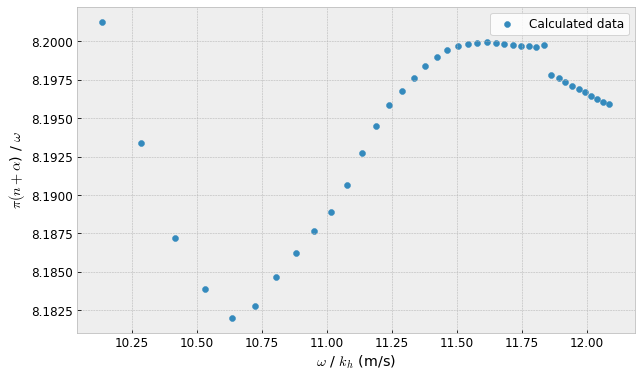

In [130]:

with plt.style.context('bmh'):
    plt.xlabel('$\omega$ / $k_h$ (m/s)')
    plt.ylabel(r'$\pi (n+\alpha$) / $\omega$')
    
    plt.rcParams.update({'font.size': 16})
    
    plt.scatter(np.log(x), np.log(y), label='Calculated data')
plt.legend()
plt.show()

i can see that there's a part of the graph in which the dispersion relation becomes horizontal => pi(n+alpha/omega) is aproximately constant.

that is, F function is almost constant. take an average value + perturbation/term of a given order n.

[ 8.00314546e-03  3.18396274e+01 -2.42672840e+01]
349.2905890348703


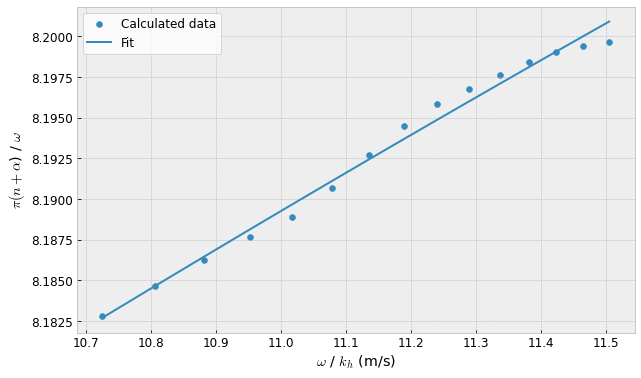

In [136]:
# fit
xx=np.log(x)
yy=np.log(y)

guess = [1, 0.025,8.023]

pars, cov = curve_fit(power_law, xx[5:20], yy[5:20], p0=guess, maxfev=50000)

fit_y = power_law(xx[5:20], pars[0], pars[1],pars[2])
with plt.style.context('bmh'):
    plt.xlabel('$\omega$ / $k_h$ (m/s)')
    plt.ylabel(r'$\pi (n+\alpha$) / $\omega$')
    plt.rcParams.update({'font.size': 12})
    plt.scatter(xx[5:20], yy[5:20], label='Calculated data')
    plt.plot(xx[5:20], fit_y, '-', label='Fit')
plt.legend()

print(pars)
print(np.sqrt((cov[0][0]+cov[1][1]+cov[2][2]))/len(xx))

# Sound speed inside the sun estimation

The data plotted was calculated in the mathematica files.

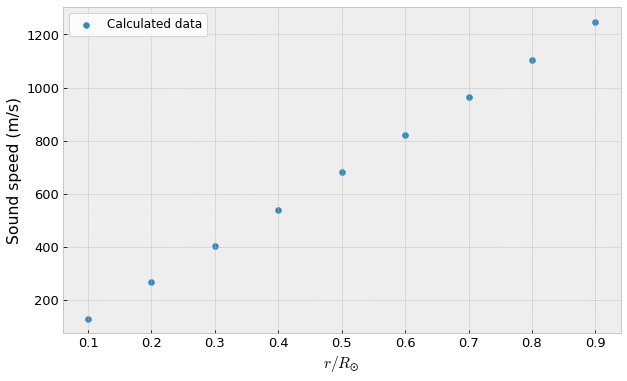

In [122]:
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 13})
    ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    c = [131.816, 267.72, 405.27, 540.36, 683.374, 823.5, 964.182, 1105.35, 1246.93]

    plt.scatter(ratios, c, label='Calculated data')
    plt.xlabel('$r/R_\u2609$')
    plt.ylabel('Sound speed (m/s)')
plt.legend()
plt.show()